In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kaggle data science/alldata.csv')

In [3]:
import seaborn as sns

In [4]:
df.describe()

,reviews
count,5326.000000
mean,3179.089185
std,8448.515056
min,2.000000
25%,27.000000
50%,230.000000
75%,1578.000000
max,148114.000000


In [5]:
df.iloc[:,1:3]

,company,description
0,ALS TDI,Development Director\nALS Therapy Development ...
1,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc..."
2,Xpert Staffing,"Growing company located in the Atlanta, GA are..."
3,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...
4,Emory University,DESCRIPTION\nThe Emory University Department o...
...,...,...
6959,NetApp,Are you data-driven? We at NetApp believe in t...
6960,"Pharmacyclics, an Abbvie Company",Pharmacyclics is committed to the development ...
6961,Oath Inc,"Oath, a subsidiary of Verizon, is a values-led..."
6962,Microsoft,We are the Bing Core Relevance team responsibl...


In [6]:
df.isna()

,position,company,description,reviews,location
0,False,False,False,True,False
1,False,False,False,True,False
2,False,False,False,True,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
6959,False,False,False,False,False
6960,False,False,False,False,False
6961,False,False,False,False,False
6962,False,False,False,False,False


In [7]:
col=df.columns

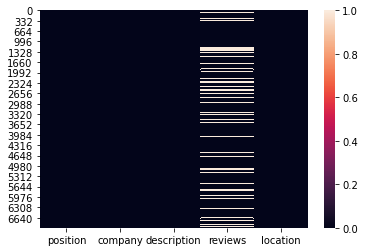

In [8]:
sns.heatmap(df[col].isna())

In [9]:
droped=df.dropna(subset=['reviews','location'])

In [10]:
print(droped['reviews'].isna().sum())

0


In [11]:
df=df.drop_duplicates

In [12]:
dfc=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/archive(1)/data.csv')

In [13]:

dfc.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [14]:
X=dfc.iloc[:,2:]
y=dfc.diagnosis

In [15]:
X=X.dropna(axis=1)

In [16]:
print(X)

     radius_mean  texture_mean  ...  symmetry_worst  fractal_dimension_worst
0          17.99         10.38  ...          0.4601                  0.11890
1          20.57         17.77  ...          0.2750                  0.08902
2          19.69         21.25  ...          0.3613                  0.08758
3          11.42         20.38  ...          0.6638                  0.17300
4          20.29         14.34  ...          0.2364                  0.07678
..           ...           ...  ...             ...                      ...
564        21.56         22.39  ...          0.2060                  0.07115
565        20.13         28.25  ...          0.2572                  0.06637
566        16.60         28.08  ...          0.2218                  0.07820
567        20.60         29.33  ...          0.4087                  0.12400
568         7.76         24.54  ...          0.2871                  0.07039

[569 rows x 30 columns]


In [17]:
#hold out validation

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.2,random_state=5)
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
result=model.score(X_test,y_test)
print(result)

0.9144736842105263


In [19]:
from sklearn.model_selection import KFold
kmodel=DecisionTreeClassifier()
fold=KFold(10)

In [20]:
import numpy as np
from sklearn.model_selection import cross_val_score
kresult=cross_val_score(kmodel,X,y,cv=fold)# use when data set not balanced
print(kresult)
print(np.mean(kresult))


[0.92982456 0.9122807  0.89473684 0.94736842 0.87719298 0.98245614
 0.9122807  0.96491228 0.94736842 0.91071429]
0.9279135338345865


In [21]:
from sklearn.model_selection import StratifiedKFold #use when imbanced data set
sfold=StratifiedKFold(n_splits=5) # ration is around 9:1

In [22]:
sresult=cross_val_score(model,X,y,cv=sfold)
print(sresult)
print(np.mean(sresult))

[0.9122807  0.92982456 0.92105263 0.92105263 0.88495575]
0.9138332557056359


In [24]:
from sklearn.model_selection import LeaveOneOut
lov=LeaveOneOut()
scores=cross_val_score(model,X,y,cv=lov)

In [25]:
print(scores)

[1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [27]:
print(np.mean(scores))

0.9261862917398945


In [28]:
from sklearn.model_selection import ShuffleSplit
sp=ShuffleSplit(n_splits=10,test_size=20)

In [29]:
scores=cross_val_score(model,X,y,cv=sp)
print(scores)
print(np.mean(scores))

[0.95 0.95 1.   0.9  0.95 0.8  0.9  0.95 0.9  0.9 ]
0.9200000000000002
